In [1]:
import pickle
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from src.results import get_panel_data, get_best_scores_table, get_scores_skills_table

In [2]:
data_path = os.path.join("..", "..", "04_Experiments", f"Normal")


ens_method = "concrete_dropout"
ens_method_ls = [
    "rand_init",
    "bagging",
    "batchensemble",
    "bayesian",
    "mc_dropout",
    "variational_dropout",
    "concrete_dropout",
]
ens_method_labels = {
    "rand_init": "Naive",
    "bagging": "Bagging",
    "batchensemble": "BatchEns.",
    "bayesian": "Bayesian",
    "mc_dropout": "MC Dropout",
    "variational_dropout": "Var. Dropout",
    "concrete_dropout": "Conc. Dropout",
}
dataset_ls = [
    "scen_1",
    "scen_4",
    "boston",
    "concrete",
    "energy",
    "kin8nm",
    "naval",
    "power",
    "protein",
    "wine",
    "yacht",
]
dataset_labels = {
    "scen_1": "Scenario 1",
    "scen_4": "Scenario 2",
    "boston": "Boston\n Housing",
    "concrete": "Concrete\n Strength",
    "energy": "Energy\n Efficiency",
    "kin8nm": "Kin8nm",
    "naval": "Naval\n Propulsion",
    "power": "Power\n Plant",
    "protein": "Protein\n Structure",
    "wine": "Red\n Wine\n Quality",
    "yacht": "Yacht\n Hydrodynamics"
}
agg_labels = {
    "lp": r"$LP$",
    "vi": r"$V_0^=$",
    "vi-a": r"$V_a^=$",
    "vi-w": r"$V_0^w$",
    "vi-aw": r"$V_a^w$",
}

In [3]:
# Get colors
agg_cols = sns.color_palette("Dark2", 8, as_cmap=True)
# Colors of aggregation methods
agg_col = {
    "lp": agg_cols.colors[4],  # type: ignore
    "vi": agg_cols.colors[5],  # type: ignore
    "vi-a": agg_cols.colors[2],  # type: ignore
    "vi-w": agg_cols.colors[0],  # type: ignore
    "vi-aw": agg_cols.colors[3],  # type: ignore
    "ens": agg_cols.colors[7],  # type: ignore
    "opt": agg_cols.colors[1],  # type: ignore
}

greens = sns.color_palette("Greens", 2, as_cmap=False)
blues = sns.color_palette("Blues", 1)
purples = sns.color_palette("Purples", 1)
reds = sns.color_palette("Reds", 3)
ens_col = {
    "rand_init": greens[1], #multi_model_cols.colors[0],  # type: ignore
    "bagging": greens[0], #multi_model_cols.colors[1],  # type: ignore
    "batchensemble": blues[0], #multi_model_cols.colors[3],  # type: ignore
    "bayesian": purples[0], #multi_model_cols.colors[8],  # type: ignore
    "mc_dropout": reds[2], #dropout_cols.colors[14],  # type: ignore
    "variational_dropout": reds[1], #dropout_cols.colors[16],  # type: ignore
    "concrete_dropout": reds[0], #dropout_cols.colors[15],  # type: ignore
}

# KIT colors
kit_cols_dict = {
    "green": "#00876C",
    "blue": "#4664AA",
    "black": "#000000",
    "grey": "#404040",
}

In [4]:
score_vec = ["crps", "crpss", "me", "lgt", "cov", "a", "w"]
nn_vec = ["drn", "bqn"]
n_ens_vec = np.arange(start=2, stop=10 + 2, step=2)
agg_meths = ["lp", "vi", "vi-a", "vi-w", "vi-aw"]

In [5]:
export = True
save_dir = os.path.join("plots", "results")

# Get learned dropout rates

In [6]:
drn_choice = {
    "scen_1": "norm",
    "scen_4": "norm",
    'boston': '0tnorm',
    'concrete': '0tnorm',
    'energy': '0tnorm',
    'kin8nm': '0tnorm',
    'naval': '0tnorm',
    'power': 'norm',
    'protein': 'norm',
    'wine': 'tnorm',
    'yacht': '0tnorm',
}

bqn_choice = {
    "scen_1": "norm",
    "scen_4": "norm",
    'boston': '0tnorm',
    'concrete': '0tnorm',
    'energy': '0tnorm',
    'kin8nm': '0tnorm',
    'naval': '0tnorm',
    'power': 'norm',
    'protein': 'norm',
    'wine': 'tnorm',
    'yacht': '0tnorm',
}

paths = {
    "norm": os.path.join("..", "..", "04_Experiments", "Normal_final"),
    "tnorm": os.path.join("..", "..", "04_Experiments", "t_Normal_final"),
    "0tnorm": os.path.join("..", "..", "04_Experiments", "0t_Normal_final"),    
}

In [7]:
df = pd.DataFrame()

for dataset in dataset_ls:
    filename = f"concrete_dropout_rates_{dataset}_concrete_dropout.txt"
    path = paths[drn_choice[dataset]]
    nn_type, p1, p2 = np.loadtxt(os.path.join(path, filename), dtype=(str, str), unpack=True, usecols=(0, 3, 4))
    p1_extractor = lambda x: x[1:-1]
    p1_clean = np.array([p1_extractor(elem) for elem in p1]).astype("float")
    
    p2_extractor = lambda x: x[:-1]
    p2_clean = np.array([p2_extractor(elem) for elem in p2]).astype("float")
    
    df_temp = pd.DataFrame({"nn": nn_type, "Dataset": dataset, "1": p1_clean, "2": p2_clean})
    
    df = pd.concat(
        (df, df_temp), ignore_index=True
    )
    
df_melt = pd.melt(df, id_vars=["nn", "Dataset"], value_vars=["1", "2"], value_name="Learned dropout rate", var_name="Hidden layer")

In [8]:
df_melt

,nn,Dataset,Hidden layer,Learned dropout rate
0,DRN,scen_1,1,0.023469
1,DRN,scen_1,1,0.022867
2,BQN,scen_1,1,0.016263
3,BQN,scen_1,1,0.023337
4,DRN,scen_1,1,0.021201
...,...,...,...,...
815,DRN,yacht,2,0.111864
816,BQN,yacht,2,0.111455
817,BQN,yacht,2,0.109287
818,BQN,yacht,2,0.109086


In [9]:
df_melt[(df_melt["Dataset"].isin(["naval"]))]["Learned dropout rate"].mean() * 100

48.02895295000001

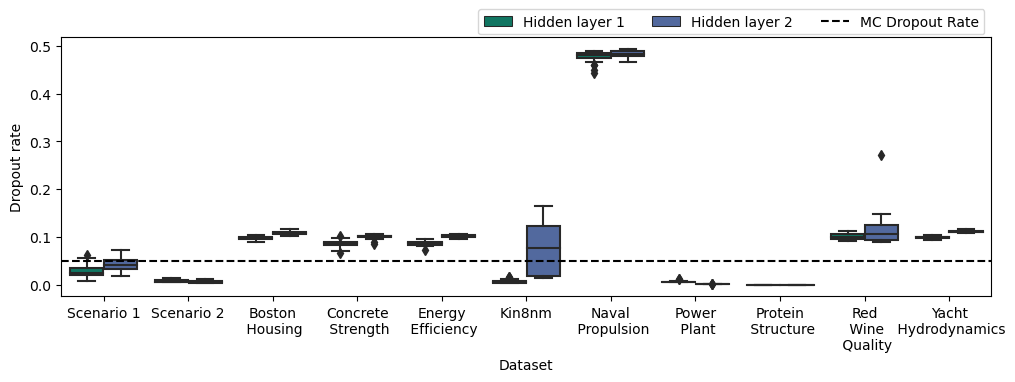

In [10]:
fig = plt.figure(figsize=(12, 3.5))
ax = fig.add_subplot(111)

sns.boxplot(data=df_melt, x="Dataset", y="Learned dropout rate", hue="Hidden layer", ax=ax, palette={"1": kit_cols_dict["green"], "2": kit_cols_dict["blue"]}, showfliers=True)
ax.axhline(y=0.05, linestyle="dashed", color=kit_cols_dict["black"])

ax.set_xticklabels([dataset_labels.get(column_name) for column_name in dataset_ls])
ax.set_ylabel("Dropout rate")

curr_handles, curr_labels = ax.get_legend_handles_labels()
ax.legend([],[], frameon=False)
axhline = matplotlib.lines.Line2D([0], [0], linestyle="dashed", color=kit_cols_dict["black"])  # type: ignore
curr_handles.append(axhline)
labels = ["Hidden layer 1", "Hidden layer 2", "MC Dropout Rate"]
fig.subplots_adjust(top=0.85)
fig.legend(curr_handles, labels, bbox_to_anchor=(0.9, 0.95), ncol=3)
# fig.suptitle("Learned dropout rates of hidden layers per dataset using Concrete Dropout", y=1)

filename=os.path.join(save_dir, "07_concrete_dropout_rates.pdf")
fig.savefig(filename, bbox_inches='tight')
filename=os.path.join(save_dir, "07_concrete_dropout_rates.png")
fig.savefig(filename, bbox_inches='tight')

Text(0.5, 1, 'Learned dropout rates of hidden layers per dataset using Concrete Dropout')

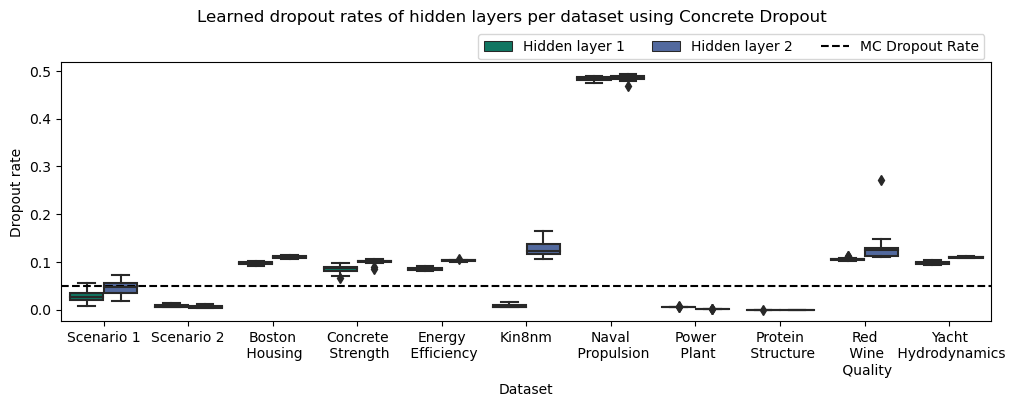

In [32]:
df_temp = df_melt[df_melt["nn"] == "BQN"]

fig = plt.figure(figsize=(12, 3.5))
ax = fig.add_subplot(111)

sns.boxplot(data=df_temp, x="Dataset", y="Learned dropout rate", hue="Hidden layer", ax=ax, palette={"1": kit_cols_dict["green"], "2": kit_cols_dict["blue"]}, showfliers=True)
ax.axhline(y=0.05, linestyle="dashed", color=kit_cols_dict["black"])

ax.set_xticklabels([dataset_labels.get(column_name) for column_name in dataset_ls])
ax.set_ylabel("Dropout rate")

curr_handles, curr_labels = ax.get_legend_handles_labels()
ax.legend([],[], frameon=False)
axhline = matplotlib.lines.Line2D([0], [0], linestyle="dashed", color=kit_cols_dict["black"])  # type: ignore
curr_handles.append(axhline)
labels = ["Hidden layer 1", "Hidden layer 2", "MC Dropout Rate"]
fig.subplots_adjust(top=0.85)
fig.legend(curr_handles, labels, bbox_to_anchor=(0.9, 0.95), ncol=3)
fig.suptitle("Learned dropout rates of hidden layers per dataset using Concrete Dropout", y=1)

# filename=os.path.join(save_dir, "07_concrete_dropout_rates.pdf")
# fig.savefig(filename, bbox_inches='tight')
# filename=os.path.join(save_dir, "07_concrete_dropout_rates.png")
# fig.savefig(filename, bbox_inches='tight')